### Titanic: Machine Learning from Disaster
### Predict survival on the Titanic

In [76]:
import pandas as pd
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
train = pd.read_csv('C:/Users/tusha/Downloads/titanic/train.csv')

In [79]:
test = pd.read_csv('C:/Users/tusha/Downloads/titanic/test.csv')

In [80]:
train.shape

(891, 12)

In [81]:
test.shape

(418, 11)

In [82]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [83]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### countplot Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

<function matplotlib.pyplot.show(*args, **kw)>

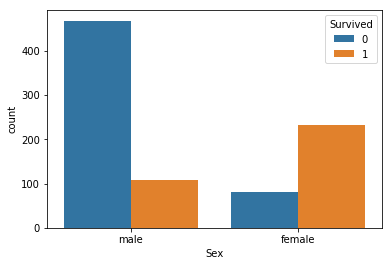

In [86]:
sns.countplot('Sex', hue='Survived' ,data = train)
plt.show

### The Chart confirms **Women** more likely survivied than **Men**

<function matplotlib.pyplot.show(*args, **kw)>

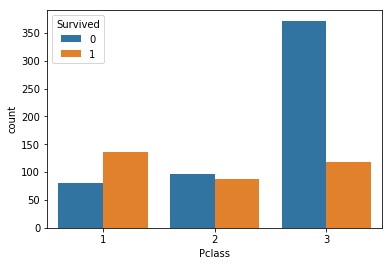

In [87]:
sns.countplot('Pclass', hue='Survived' ,data = train)
plt.show

### The Chart confirms **1st class** more likely survivied than **other classes** 
### The Chart confirms **3rd class** more likely dead than **other classes**

<function matplotlib.pyplot.show(*args, **kw)>

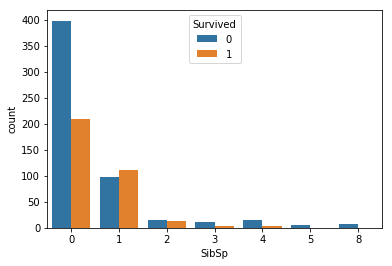

In [88]:
sns.countplot('SibSp', hue='Survived' ,data = train)
plt.show

### The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
### The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

<function matplotlib.pyplot.show(*args, **kw)>

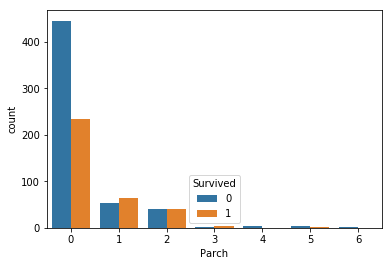

In [89]:
sns.countplot('Parch', hue='Survived' ,data = train)
plt.show

### The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived .
### The Chart confirms ** a person aboarded alone** more likely dead

<function matplotlib.pyplot.show(*args, **kw)>

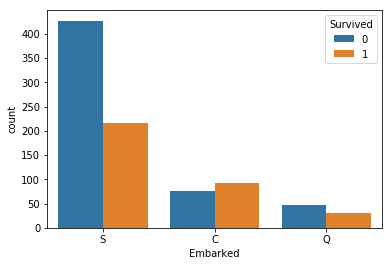

In [90]:
 sns.countplot('Embarked', hue='Survived' ,data = train)
plt.show

### The Chart confirms **a person aboarded from C** slightly more likely survived  
### The Chart confirms **a person aboarded from Q** more likely dead  
### The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

### Name

In [91]:
train_test_data = [train,test]

In [92]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [93]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Sir           1
Jonkheer      1
Countess      1
Capt          1
Mme           1
Lady          1
Don           1
Name: Title, dtype: int64

In [94]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [95]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [96]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [97]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

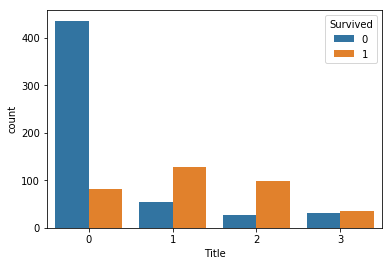

In [98]:
sns.countplot('Title',hue='Survived', data= train)
plt.show()

In [99]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [100]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [101]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

### sex

In [102]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

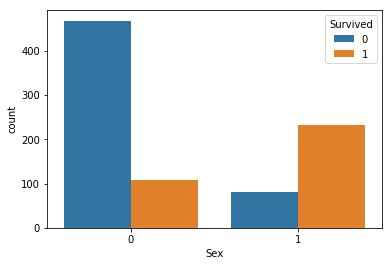

In [103]:
sns.countplot('Sex',hue='Survived', data= train)
plt.show()

In [104]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [105]:
train.head(30)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.0      1      0         A/5 21171   
1             2         1       1    1  38.0      1      0          PC 17599   
2             3         1       3    1  26.0      0      0  STON/O2. 3101282   
3             4         1       1    1  35.0      1      0            113803   
4             5         0       3    0  35.0      0      0            373450   
5             6         0       3    0  30.0      0      0            330877   
6             7         0       1    0  54.0      0      0             17463   
7             8         0       3    0   2.0      3      1            349909   
8             9         1       3    1  27.0      0      2            347742   
9            10         1       2    1  14.0      1      0            237736   
10           11         1       3    1   4.0      1      1           PP 9549   
11           12         1       1    1  58.0      0      0            113783   
12           13         0       3    0  20.0      0      0         A/5. 2151   
13           14         0       3    0  39.0      1      5            347082   
14           15         0       3    1  14.0      0      0            350406   
15           16         1       2    1  55.0      0      0            248706   
16           17         0       3    0   2.0      4      1            382652   
17           18         1       2    0  30.0      0      0            244373   
18           19         0       3    1  31.0      1      0            345763   
19           20         1       3    1  35.0      0      0              2649   
20           21         0       2    0  35.0      0      0            239865   
21           22         1       2    0  34.0      0      0            248698   
22           23         1       3    1  15.0      0      0            330923   
23           24         1       1    0  28.0      0      0            113788   
24           25         0       3    1   8.0      3      1            349909   
25           26         1       3    1  38.0      1      5            347077   
26           27         0       3    0  30.0      0      0              2631   
27           28         0       1    0  19.0      3      2             19950   
28           29         1       3    1  21.0      0      0            330959   
29           30         0       3    0  30.0      0      0            349216   

        Fare        Cabin Embarked  Title  
0     7.2500          NaN        S      0  
1    71.2833          C85        C      2  
2     7.9250          NaN        S      1  
3    53.1000         C123        S      2  
4     8.0500          NaN        S      0  
5     8.4583          NaN        Q      0  
6    51.8625          E46        S      0  
7    21.0750          NaN        S      3  
8    11.1333          NaN        S      2  
9    30.0708          NaN        C      2  
10   16.7000           G6        S      1  
11   26.5500         C103        S      1  
12    8.0500          NaN        S      0  
13   31.2750          NaN        S      0  
14    7.8542          NaN        S      1  
15   16.0000          NaN        S      2  
16   29.1250          NaN        Q      3  
17   13.0000          NaN        S      0  
18   18.0000          NaN        S      2  
19    7.2250          NaN        C      2  
20   26.0000          NaN        S      0  
21   13.0000          D56        S      0  
22    8.0292          NaN        Q      1  
23   35.5000           A6        S      0  
24   21.0750          NaN        S      1  
25   31.3875          NaN        S      2  
26    7.2250          NaN        C      0  
27  263.0000  C23 C25 C27        S      0  
28    7.8792          NaN        Q      1  
29    7.8958          NaN        S      0

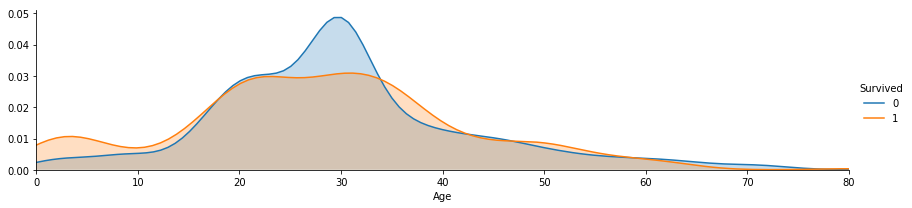

In [106]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

In [107]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4,

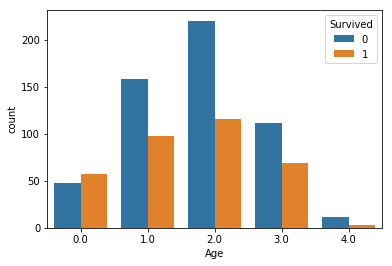

In [108]:
sns.countplot('Age',hue='Survived',data=train)
plt.show()

### Embarked

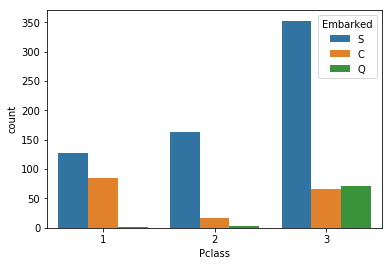

In [109]:
sns.countplot('Pclass', hue='Embarked',data=train)
plt.show()

In [110]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [111]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [112]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### Fare

In [113]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0      0      0            113783   
12           13         0       3    0  1.0      0      0         A/5. 2151   
13           14         0       3    0  3.0      1      5            347082   
14           15         0       3    1  0.0      0      0            350406   
15           16         1       2    1  3.0      0      0            248706   
16           17         0       3    0  0.0      4      1            382652   
17           18         1       2    0  2.0      0      0            244373   
18           19         0       3    1  2.0      1      0            345763   
19           20         1       3    1  2.0      0      0              2649   
20           21         0       2    0  2.0      0      0            239865   
21           22         1       2    0  2.0      0      0            248698   
22           23         1       3    1  0.0      0      0            330923   
23           24         1       1    0  2.0      0      0            113788   
24           25         0       3    1  0.0      3      1            349909   
25           26         1       3    1  3.0      1      5            347077   
26           27         0       3    0  2.0      0      0              2631   
27           28         0       1    0  1.0      3      2             19950   
28           29         1       3    1  1.0      0      0            330959   
29           30         0       3    0  2.0      0      0            349216   
30           31         0       1    0  3.0      0      0          PC 17601   
31           32         1       1    1  2.0      1      0          PC 17569   
32           33         1       3    1  1.0      0      0            335677   
33           34         0       2    0  4.0      0      0        C.A. 24579   
34           35         0       1    0  2.0      1      0          PC 17604   
35           36         0       1    0  3.0      1      0            113789   
36           37         1       3    0  2.0      0      0              2677   
37           38         0       3    0  1.0      0      0        A./5. 2152   
38           39         0       3    1  1.0      2      0            345764   
39           40         1       3    1  0.0      1      0              2651   
40           41         0       3    1  3.0      1      0              7546   
41           42         0       2    1  2.0      1      0             11668   
42           43         0       3    0  2.0      0      0            349253   
43           44         1       2    1  0.0      1      2     SC/Paris 2123   
44           45         1       3    1  1.0      0      0            330958   
45           46         0       3    0  2.0      0      0   S.C./A.4. 23567   
46           47         0       3    0  2.0      1      0            370371   
47           48         1       3    1  1.0      0      0             14311   
48           49         0       3    0  2.0      2      0              2662   
49           50         0       3    1  1.0      1    

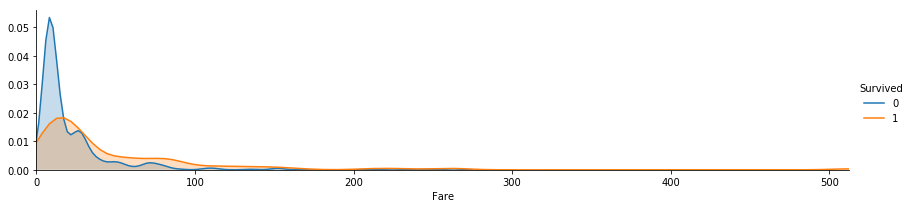

In [114]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [115]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 40), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 40) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [116]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

### cabin

In [117]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F33                3
C22 C26            3
F2                 3
E101               3
D                  3
C2                 2
B18                2
C93                2
D26                2
B51 B53 B55        2
E8                 2
E33                2
B57 B59 B63 B66    2
E121               2
D36                2
C126               2
C52                2
D17                2
B28                2
E67                2
D33                2
D20                2
B49                2
B35                2
B22                2
B20                2
B58 B60            2
                  ..
B50                1
C110               1
B30                1
E63                1
E68                1
B37                1
E38                1
F E69              1
C47                1
E34                1
C111               1
B4                 1
B38                1
B80                1
A14                1
B86                1
C45          

In [118]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

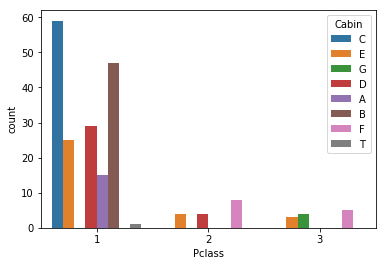

In [119]:
sns.countplot('Pclass',hue = 'Cabin',data = train)

In [120]:
cabin_mapping = {"A": 0, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [121]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### Familysize

In [122]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

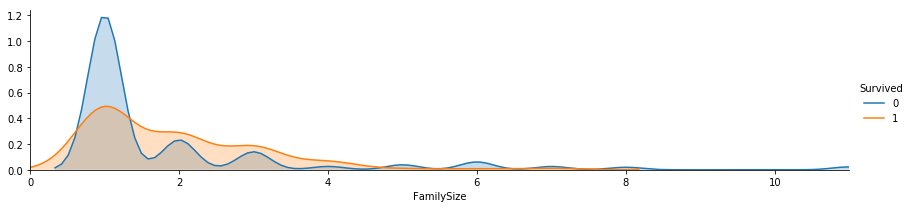

In [123]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [124]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [125]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [126]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    6.0         0      0           2
1       1    1  3.0   2.0    3.0         1      2           2
2       3    1  1.0   0.0    6.0         0      1           1
3       1    1  2.0   2.0    3.0         0      2           2
4       3    0  2.0   0.0    6.0         0      0           1
5       3    0  2.0   0.0    6.0         2      0           1
6       1    0  3.0   2.0    5.0         0      0           1
7       3    0  0.0   1.0    6.0         0      3           5
8       3    1  2.0   0.0    6.0         0      2           3
9       2    1  0.0   1.0    5.5         1      2           2

### modeling

In [127]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


### Cross Validation (K-fold)

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [130]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.76404494 0.84269663 0.82022472 0.79775281 0.82022472
 0.82022472 0.80898876 0.82022472 0.83146067]


In [131]:
# kNN Score
round(np.mean(score)*100, 2)

81.37

### Decision Tree

In [132]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.79775281 0.76404494 0.7752809  0.87640449 0.75280899
 0.84269663 0.80898876 0.75280899 0.7752809 ]


In [133]:
# decision tree Score
round(np.mean(score)*100, 2)

79.02

### Random Forest

In [134]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.82022472 0.79775281 0.82022472 0.79775281
 0.83146067 0.80898876 0.7752809  0.7752809 ]


In [135]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.47

### Naive Bayes

In [136]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.75280899 0.7752809  0.75280899 0.73033708 0.80898876
 0.75280899 0.79775281 0.86516854 0.83146067]


In [137]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

79.01

### SVM

In [138]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

[0.82222222 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.82022472 0.84269663 0.83146067 0.86516854]


C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [139]:
round(np.mean(score)*100,2)

82.94

### testing

In [140]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\tusha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [141]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('result.csv', index=False)

In [142]:
submission = pd.read_csv('result.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1